## Import all the relevant Modules 

In [1]:
%matplotlib inline


#TODO: Rename module shortcuts such as hb into something usefull after development
import Modules.Hubbard_Model as hb
from Modules.General.Module_Widgets_and_Sliders import Text_Box, Save_Figure_Button, Click_Save_Figure, set_filename

# default Jupyter widgets
import ipywidgets as widgets
from ipywidgets import HBox, VBox

# Plotting
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark')
plt.rcParams.update({'font.size':16})

# for printlenght and save figures button
import functools
import numpy as np
np.set_printoptions(linewidth=150) #set output length, default=75

def close_widgets(DIR):
    """ Close all widgets `wi` and displays `di` in notebook directory `dir()`.
    """
    for i in range(100):
        if f"w{i}" in DIR:
            exec(f"w{i}.close()")
        if f"d{i}" in DIR:
            exec(f"d{i}.close()")
            

%load_ext autoreload
%autoreload 2

# Dynamical Correlation Functions
<!---  Define a few convenience macros for bra-ket notation. -->
$\newcommand{\ket}[1]{\left\vert{#1}\right\rangle}$
$\newcommand{\bra}[1]{\left\langle{#1}\right\vert}$
$\newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}$
$\newcommand{\dyad}[2]{\left|{#1}\middle\rangle\middle\langle{#2}\right|}$
$\newcommand{\mel}[3]{\left\langle{#1}\vphantom{#2#3}\right|{#2}\left|{#3}\vphantom{#1#2}\right\rangle}$
$\newcommand{\expval}[1]{\left\langle{#1}\right\rangle}$
$\newcommand\dif{\mathop{}\!\mathrm{d}}$
$\newcommand\ii{\mathrm{i}}$
$\newcommand{\coloneqq}{\mathop{:=}}$
$\newcommand{\abs}[1]{\left\vert{#1}\right\vert}$
$\newcommand{\vb}[1]{\mathbf{#1}}$
$\newcommand{\im}[1]{\operatorname{Im}{#1}}$
$\newcommand{\re}[1]{\operatorname{Re}{#1}}$

Up until now we only looked at equal time correlation functions. We want to further look at so called **dynamical correlation functions** which depend on time or frequency. To this end we define the time dependent correlation function
$$ \large
	\expval{\hat{A}(t)\hat{B}(0)} \coloneqq \mel{\psi_g}{e^{\ii t \hat{H}} \hat{A} e^{-\ii t \hat{H}}  \hat{B}}{\psi_g},
$$
where $\hat{A}$ and $\hat{B}$ are arbitrary operators and $\hat{A}(t) \coloneqq e^{\ii t \hat{H}} \hat{A} e^{-\ii t \hat{H}}$ is the time evolution of the operator $\hat{A}$.


## Spectral Representation of the Correlation Function
By using the completeness relation of the Hamiltonian's eigenfunctions $\ket{n}$, i.e. $1 = \sum_n \dyad{n}{n}$ and the eigenvalue equation for $H$, we can rewrite the correlation function as
\begin{align*} \large
	\expval{\hat{A}(t)\hat{B}(0)} &\coloneqq \mel{\psi_g}{e^{\ii t \hat{H}} \hat{A} e^{-\ii t \hat{H}}  \hat{B}}{\psi_g} \\
	%
	&= \sum_n  \mel{\psi_g}{e^{\ii t \hat{H}} \hat{A} \dyad{n}{n} e^{-\ii t \hat{H}}  \hat{B}}{\psi_g} \\
	%
	&= \sum_n e^{-\ii t (E_n - E_g)} \mel{\psi_g}{ \hat{A} }{n}\mel{n} {\hat{B}}{\psi_g} \\
	%
	&= \sum_n e^{-\ii t \bar{E}_n} \mel{\psi_g}{ \hat{A} }{n}\mel{n} {\hat{B}}{\psi_g},
\end{align*}
where we defined the energy difference $\bar{E}_n \coloneqq E_n - E_g$.
Note that we drastically simplified the expression from the exponential of an operator to an exponential of just a number.
As we have the sum of exponentials, it is natural to look at the Fourier transform of the correlation function.

## Fourier Transform of the Correlation Function
If one were to naively apply the Fourier transform from time domain $t$ to frequency domain $\omega$ of the correlation function, one would obtain an expression
$$ \large
	\propto \int_{-\infty}^{\infty} \dif{t} \, e^{-\ii t (\omega - \bar{E}_n)}, 
$$
which is unfortunately not well defined as a function, but only in a distributional sence. We will remedy this problem in measurability in a twofold way.
First, we will restrict the time range to the interval $[0, \infty]$.
From a physical point of few this implies that we are only interested in the correlation of the system were Operator $\hat{A}$ is applied after operator $\hat{B}$ was applied. 
One calls this the **causal Green's function** 
$$ \large
	G_{AB}(t) \coloneqq \Theta(t) \mel{\psi_g}{e^{\ii t \hat{H}} \hat{A} e^{-\ii t \hat{H}}  \hat{B}}{\psi_g} = \Theta(t) \sum_n e^{-\ii t \bar{E}_n} \mel{\psi_g}{ \hat{A} }{n}\mel{n} {\hat{B}}{\psi_g}.
$$,
where $\Theta(t)$ is the Heaviside step function.

The second step is to promote $\omega$ to a complex number, i.e. $\omega \to \Omega \coloneqq \omega + \ii \delta$. We can therefore evaluate the Fourier transformation of the causal Green's function as
$$ \large
	 \int_{-\infty}^{\infty} \dif{t} \, \Theta(t) \, e^{-\ii t (\omega - \bar{E}_n)} =  \int_{0}^{\infty} \dif{t} \, e^{-\ii t (\omega - \bar{E}_n)} = \frac{1}{\omega + \ii \delta - \bar{E}_n} \quad \mathrm{for} \quad \delta > 0.
$$
To finally obtain the Fourier transform of the causal Green's function we have to take the limit $\delta \to 0$ from above, which gives (keeping in mind, that a distributional is only defined via integration by a test function)
$$
	\lim_{\delta \to 0} \int_{-\infty}^{\infty} \dif{\omega} \,\frac{1}{\omega + \ii \delta - \bar{E}_n} = \mathrm{P.V.} \left(\int_{-\infty}^{\infty} \dif{\omega} \,\frac{1}{\omega - \bar{E}_n}\right) - \ii \pi \delta(\omega - \bar{E}_n),
$$
where $\mathrm{P.V.}$ denotes the principal value of an integral. 
This results in our final result for the Fourier transform of the causal Green's function
$$ \large
	\tilde{G}_{AB}(\omega) \coloneqq \sum_n \mel{\psi_g}{ \hat{A} }{n}\mel{n} {\hat{B}}{\psi_g} \left( \mathrm{P.V.} \left(\int_{-\infty}^{\infty} \dif{\omega} \,\frac{1}{\omega - \bar{E}_n}\right) - \ii \pi \delta(\omega - \bar{E}_n)\right).
$$,

## Numercial Approximation of $\tilde{G}_{AB}(\omega)$

Since neither the principal value nor the delta distribution are well defined in a numerical sense, to visualize them we have to approximate them by using **Lorentzian curves** for the real and imaginary part of $\tilde{G}_{AB}(t)$. 
The Lorentzian curves are defined as
$$
\large
\begin{align*} 
	\im{\tilde{G}_{AB}(\omega)} &\approx \sum_n  \mel{\psi_g}{ \hat{A} }{n}\mel{n} {\hat{B}}{\psi_g} \left( \frac{\delta}{(\omega - \bar{E}_n)^2 + \delta^2} \right) \\
	%
	\re{\tilde{G}_{AB}(\omega)} &\approx \sum_n  \mel{\psi_g}{ \hat{A} }{n}\mel{n} {\hat{B}}{\psi_g} \left( \frac{\bar{E}_n - \omega }{(\omega - \bar{E}_n)^2 + \delta^2} \right).
\end{align*}
$$,
where $\delta \ll 1$ is a small parameter that assures finite width of the Lorentzian curves.

In [77]:
def ImL(w, d, E):
    return d / ((w**2 - E**2)**2 + d**2)

def ReL(w, d, E):
    return (E - w) / ((w**2 - E**2)**2 + d**2)

def G(func, w, d, E, A, B):
		return np.sum(A * B * func(w, d, E)[:, np.newaxis], axis=1)

In [78]:
ReL(w, 0.1, E).shape

(1000,)

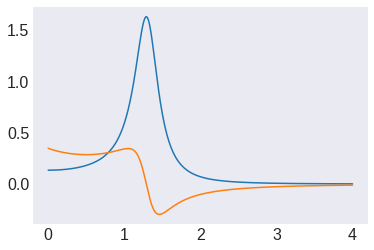

In [103]:
w = np.linspace(0, 4, 1000)
E = np.random.rand() * 3

#plt.plot(w, L(w, 0.1, E));
plt.plot(w, G(ImL, w, 0.5, E, A, B));
plt.plot(w, G(ReL, w, 0.5, E, A, B));

In [98]:
G(ImL, w, 0.1, E, A, B).round(2)

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0. 

In [51]:
a = np.arange(2,7)
b = np.arange(5)
a

array([2, 3, 4, 5, 6])

In [50]:
a * b[:, np.newaxis]

array([[ 0,  0,  0,  0,  0],
       [ 2,  3,  4,  5,  6],
       [ 4,  6,  8, 10, 12],
       [ 6,  9, 12, 15, 18],
       [ 8, 12, 16, 20, 24]])

In [96]:
rand = np.random.rand(100)*0.1
A = np.where(rand > 0.095, rand, rand)
B = A * 2
A

array([0.09494731, 0.09249334, 0.08716973, 0.08122541, 0.09784941, 0.07400073, 0.04097276, 0.0376758 , 0.05686159, 0.00780816, 0.0711192 ,
       0.06637591, 0.01061867, 0.05044367, 0.09918158, 0.09068809, 0.09080773, 0.00616196, 0.08175026, 0.03556322, 0.00970957, 0.00652252,
       0.04231806, 0.09876124, 0.03221454, 0.08979984, 0.08694403, 0.03531189, 0.00222632, 0.04161001, 0.09510983, 0.07372914, 0.03578752,
       0.06858726, 0.02909436, 0.08191542, 0.02974267, 0.02757027, 0.09113756, 0.03198376, 0.00464855, 0.02146956, 0.07309293, 0.09575156,
       0.05714839, 0.03691674, 0.00221827, 0.03661332, 0.07449366, 0.07136352, 0.02059169, 0.06217356, 0.05958687, 0.07829707, 0.06265697,
       0.04948568, 0.08583472, 0.03252881, 0.09624709, 0.08449521, 0.06289835, 0.03865992, 0.00458994, 0.00442495, 0.05202862, 0.08714741,
       0.08362543, 0.07363407, 0.06237535, 0.07597837, 0.05578402, 0.07240855, 0.00966173, 0.09226944, 0.03880179, 0.02228326, 0.06159151,
       0.05936983, 0.071247

In [43]:
a = np.array([[1, 2, 3],[2,3,4]])
a

array([[1, 2, 3],
       [2, 3, 4]])

In [45]:
np.sum(a, axis=1)

array([6, 9])

In [64]:
a = np.arange(3)
b = np.arange(2,7)

In [76]:
np.sum(a * b[:, np.newaxis], axis=1)

array([ 6,  9, 12, 15, 18])

In [67]:
b

array([2, 3, 4, 5, 6])

In [74]:
a

array([0, 1, 2])